In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter, OrderedDict
import networkx as nx

import utils

%matplotlib inline

## Load + Assess

In [2]:
#location of raw data
user_dir = 'data/user.json'

user_df = utils.chunk_loader(user_dir, read_limit=-1)

In [3]:
user_df.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.03,1,0,1,2,0,0,1,0,1,...,25,"2015,2016,2017",5,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",17,Rashmi,95,84,l6BmjZMeQD3rDxWUbiAiow,2013-10-08 23:11:33
1,3.63,1,0,1,1,0,0,0,0,0,...,16,,4,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",22,Jenna,33,48,4XChL029mKr5hydo79Ljxg,2013-02-21 22:29:06
2,3.71,0,0,0,0,0,0,1,0,0,...,10,,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",8,David,16,28,bc8C_eETBWL0olvFSJJd0w,2013-10-04 00:16:10
3,4.85,0,0,0,1,0,0,0,0,2,...,14,,5,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",4,Angela,17,30,dD0gZpBctWGdWo9WlGuhlA,2014-05-22 15:57:30
4,4.08,80,0,80,28,1,1,16,5,57,...,665,"2015,2016,2017,2018",39,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",279,Nancy,361,1114,MM4RJAeH6yuaN8oZDSt0RA,2013-10-23 07:02:50


In [4]:
user_df.tail()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
1637133,4.5,0,0,0,0,0,0,0,0,0,...,0,,0,None,0,Jiaxin,2,0,oC4BjbB4I-wx5KBAO1k2Gg,2016-02-24 19:28:47
1637134,4.0,0,0,0,0,0,0,0,0,0,...,0,,0,None,0,Wes,8,0,LKd_-BT2GMWp8_1ho18kOg,2017-02-25 23:34:05
1637135,3.4,0,0,0,0,0,0,0,0,0,...,0,,0,None,0,Lee,4,8,ib_elCBhGOamS0AALkh4Og,2009-08-19 22:08:16
1637136,3.0,0,0,0,0,0,0,0,0,0,...,0,,0,None,0,Melissa,1,1,WV27LoSFDG_YmiDKTLKKLA,2018-10-15 17:07:43
1637137,5.0,0,0,0,0,0,0,0,0,0,...,0,,0,None,0,Erin,1,0,agVqH9xDhNw8n7ve66H1Uw,2016-03-03 21:56:06


In [5]:
#large dataset
user_df.shape

(1637138, 22)

In [6]:
user_df.dtypes

average_stars         float64
compliment_cool         int64
compliment_cute         int64
compliment_funny        int64
compliment_hot          int64
compliment_list         int64
compliment_more         int64
compliment_note         int64
compliment_photos       int64
compliment_plain        int64
compliment_profile      int64
compliment_writer       int64
cool                    int64
elite                  object
fans                    int64
friends                object
funny                   int64
name                   object
review_count            int64
useful                  int64
user_id                object
yelping_since          object
dtype: object

In [7]:
#check for missing values
user_df.isna().mean()

average_stars         0.0
compliment_cool       0.0
compliment_cute       0.0
compliment_funny      0.0
compliment_hot        0.0
compliment_list       0.0
compliment_more       0.0
compliment_note       0.0
compliment_photos     0.0
compliment_plain      0.0
compliment_profile    0.0
compliment_writer     0.0
cool                  0.0
elite                 0.0
fans                  0.0
friends               0.0
funny                 0.0
name                  0.0
review_count          0.0
useful                0.0
user_id               0.0
yelping_since         0.0
dtype: float64

In [8]:
user_df.describe()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count,useful
count,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06
mean,3.681462e+00,3.106818e+00,1.902082e-01,3.106818e+00,2.242225e+00,8.358489e-02,3.325951e-01,1.503944e+00,1.138432e+00,3.090273e+00,2.135135e-01,1.165329e+00,2.188046e+01,1.465646e+00,1.791785e+01,2.228770e+01,4.052770e+01
std,1.151040e+00,8.823263e+01,1.269798e+01,8.823263e+01,8.021821e+01,1.089557e+01,1.367850e+01,6.327596e+01,9.549144e+01,9.211418e+01,1.626675e+01,3.268262e+01,4.019675e+02,1.568317e+01,3.303504e+02,7.692236e+01,4.702421e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00
50%,3.890000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,3.000000e+00
75%,4.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,1.500000e+01,1.300000e+01
max,5.000000e+00,3.226600e+04,1.365400e+04,3.226600e+04,3.416700e+04,1.266900e+04,1.350000e+04,5.783300e+04,8.260200e+04,5.210300e+04,1.417300e+04,1.544200e+04,1.486580e+05,9.538000e+03,1.302070e+05,1.327800e+04,1.542020e+05


## To do List

Conveniently there are no missing values in this dataframe. The concern with the users dataframe is sorting out the ordinary users, from platform rockstars, to spam accounts.

Below is a to-do list for each feature, taking into account data types, values, and how it agrees with the documentation.
- average_stars:
    - no changes
- compliment_XXXX:
    - number compliments seem very high, distribution needs to be checked in EDA
- cool:
    - check for spammers in EDA
- elite:
    - create dummy cols for years was elite
- fans
    - no changes
- friends:
    - break up to create social network
- funny:
    - no changes
- name:
    - Not sure if a relevant feature
- review_count:
    - might have to corroborate with review content and remove outliers
- useful:
    - no changes
- user_id:
    - no changes
- yelping since:
    - make datetime object

In [9]:
def plot_hist(series, start=0, end=6, step=0.5, xlabel='xlabel', ylabel='count', feature='title', saveloc=None):
    """
    helper function for plotting histogram
    series = pandas serries
    start = bin start position
    end = bin end
    step = step size between bins
    xlabel = x label title
    ylabel = y label title
    feature = name of feature 
    saveloc = location to save to
    
    """
    plt.hist(series, bins=np.arange(start, end, step))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    #stats
    plt.axvline(series.median(), color='red',linestyle='solid', linewidth=1, label='median')
    plt.axvline(series.mean(), color='green',linestyle='solid', linewidth=1, label='mean')
    plt.axvline(series.describe()['25%'], color='orange',linestyle='dashed', linewidth=1, label='Q1')
    plt.axvline(series.describe()['75%'], color='orange',linestyle='dashed', linewidth=1, label='Q3')
    
    
    plt.legend()
    plt.title("Yelp {} Distribution".format(feature))
    plt.tight_layout()
    
    if saveloc:
        plt.savefig(saveloc)
    plt.show()
    

## average_stars

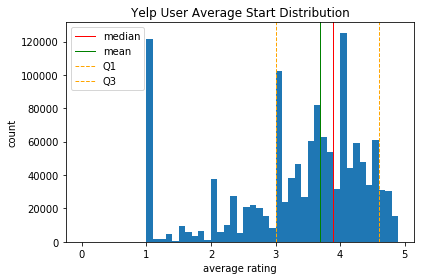

In [10]:
plot_hist(user_df['average_stars'],0,5,0.1,
          'average rating', feature='User Average Start',
          saveloc='plots/user_avg_star.png')

## compliment_cool

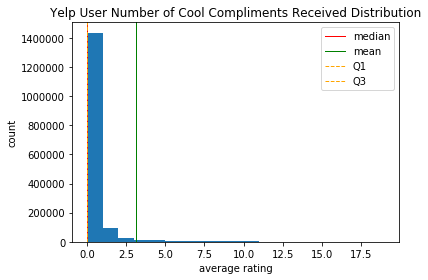

In [11]:
plot_hist(user_df['compliment_cool'],0,20,1,
          'average rating', feature='User Number of Cool Compliments Received',
          saveloc='plots/user_cool.png')

In [12]:
#check of users with more than 1k cool
user_df[user_df['compliment_cool']>1000].shape

(790, 22)

## compliment_cute

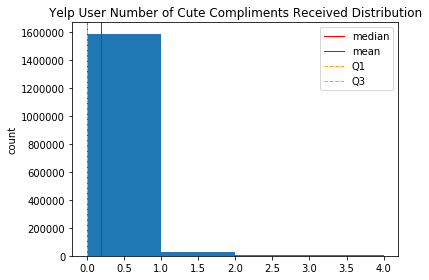

In [13]:
plot_hist(user_df['compliment_cute'],0,5,1,
          '', feature='User Number of Cute Compliments Received',
          saveloc='plots/user_cute.png')

## compliment_funny

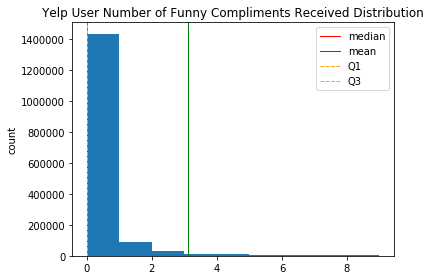

In [14]:
plot_hist(user_df['compliment_funny'],0,10,1,
          '', feature='User Number of Funny Compliments Received',
          saveloc='plots/user_funny.png')

## compliment_hot

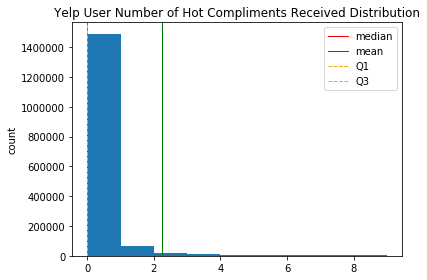

In [15]:
plot_hist(user_df['compliment_hot'],0,10,1,
          '', feature='User Number of Hot Compliments Received',
          saveloc='plots/user_hot.png')

## compliment_list

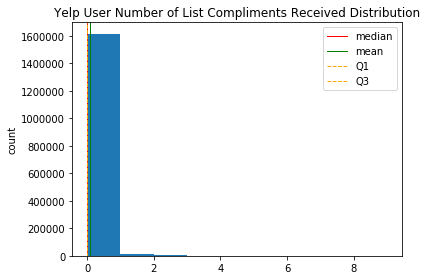

In [16]:
plot_hist(user_df['compliment_list'],0,10,1,
          '', feature='User Number of List Compliments Received',
          saveloc='plots/user_compliment_list.png')

## compliment_more

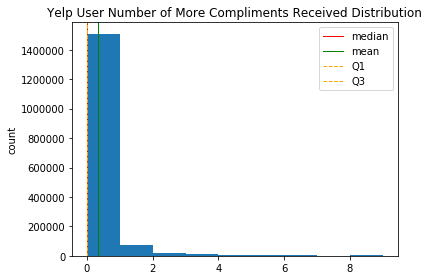

In [17]:
plot_hist(user_df['compliment_more'],0,10,1,
          '', feature='User Number of More Compliments Received',
          saveloc='plots/user_more.png')

## compliment_note

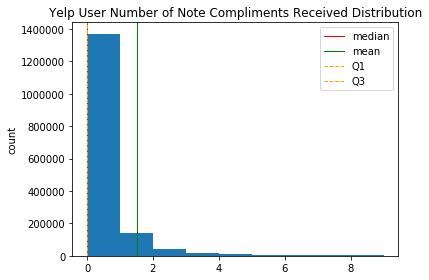

In [18]:
plot_hist(user_df['compliment_note'],0,10,1,
          '', feature='User Number of Note Compliments Received',
          saveloc='plots/user_note.png')

## compliment_photos

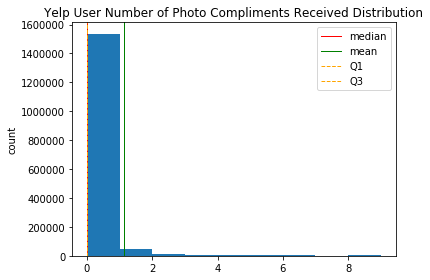

In [19]:
plot_hist(user_df['compliment_photos'],0,10,1,
          '', feature='User Number of Photo Compliments Received',
          saveloc='plots/user_photo.png')

## compliment_plain

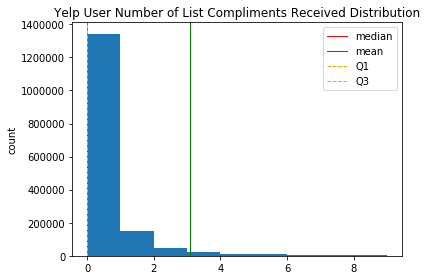

In [20]:
plot_hist(user_df['compliment_plain'],0,10,1,
          '', feature='User Number of List Compliments Received',
          saveloc='plots/user_plain.png')

## compliment_profile

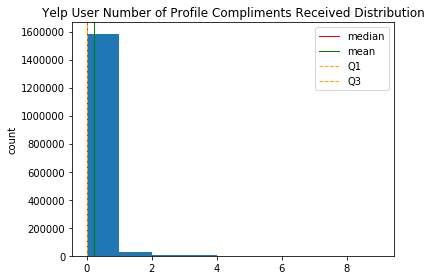

In [21]:
plot_hist(user_df['compliment_profile'],0,10,1,
          '', feature='User Number of Profile Compliments Received',
          saveloc='plots/user_profile.png')

## compliment_writer

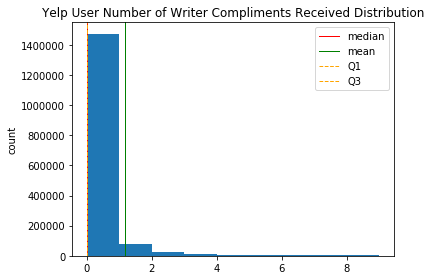

In [22]:
plot_hist(user_df['compliment_writer'],0,10,1,
          '', feature='User Number of Writer Compliments Received',
          saveloc='plots/user_writer.png')

## elite

In [23]:
#split the strings
split_elite = user_df.elite.str.split(',')

In [24]:
#see sample
split_elite[0:10]

0                                  [2015, 2016, 2017]
1                                                  []
2                                                  []
3                                                  []
4                            [2015, 2016, 2017, 2018]
5                            [2015, 2016, 2017, 2018]
6    [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]
7                                                  []
8          [2006, 2007, 2008, 2009, 2010, 2011, 2012]
9                                                  []
Name: elite, dtype: object

In [25]:
#list of all possible dates
date_list = []
#for each list in series
for split in split_elite:
    #if series not None
    if len(split)>0:
        #extend list with content
        date_list.extend(split)
    
#get unique entires
unique_dates = list(set(date_list))
#sort for presentation
unique_dates.sort()
#drop empty values
unique_dates = [x for x in unique_dates if x]
print(unique_dates)

['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']


In [26]:
#blow up columns
split_elite_series = split_elite.apply(pd.Series)
split_elite_series.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2015,2016,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,2016,2017,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#replace empty spaces with NaN
split_elite_series_fillnan = split_elite_series.replace('',np.nan)
#fill nan with 0
split_elite_series_fillnan = split_elite_series_fillnan.fillna(value=0)
#make types int
split_elite_series_fillnan = split_elite_series_fillnan.astype('int32')
#sort values inplace
split_elite_series_fillnan.values.sort()

split_elite_series_fillnan.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,2015,2016,2017
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,2015,2016,2017,2018


In [28]:
#make a copy of previous dataframe
df_elite = split_elite_series_fillnan.copy()
#rename columns
df_elite.columns = unique_dates
#replace non zero with 1
df_elite[df_elite != 0] = 1

df_elite.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,1,1,1


In [29]:
df_elite.shape

(1637138, 13)

In [30]:
#save the work
df_elite.to_csv("data/cleaned/user_elite.csv")

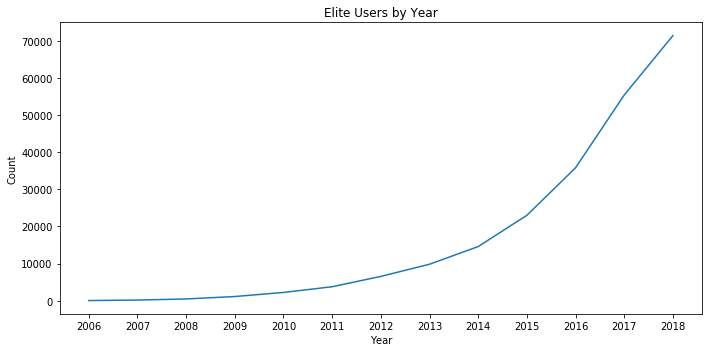

In [31]:
plt.figure(figsize=(10,5))
plt.title("Elite Users by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.plot(unique_dates, df_elite.sum(axis=0 ))
plt.tight_layout()
plt.savefig("plots/users_elite.png")
plt.show()

## fans

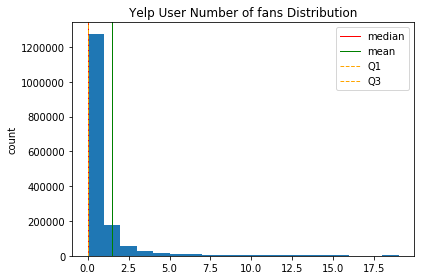

In [32]:
plot_hist(user_df['fans'],0,20,1,
          '', feature='User Number of fans',
          saveloc='plots/user_fans.png')

## funny

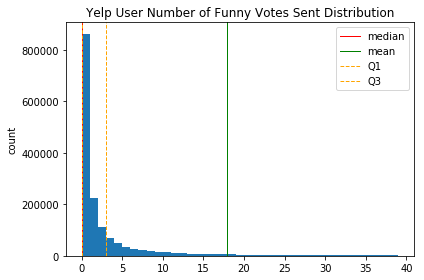

In [33]:
plot_hist(user_df['funny'],0,40,1,
          '', feature='User Number of Funny Votes Sent',
          saveloc='plots/user_funny.png')

## review_count

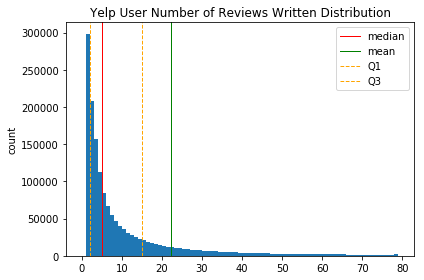

In [34]:
plot_hist(user_df['review_count'],0,80,1,
          '', feature='User Number of Reviews Written',
          saveloc='plots/user_review_count.png')

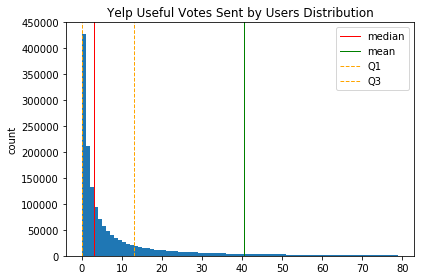

In [35]:
plot_hist(user_df['useful'],0,80,1,
          '', feature='Useful Votes Sent by Users',
          saveloc='plots/user_useful.png')

## yelpding_since

In [36]:
user_df['yelping_since'][0:10]

0    2013-10-08 23:11:33
1    2013-02-21 22:29:06
2    2013-10-04 00:16:10
3    2014-05-22 15:57:30
4    2013-10-23 07:02:50
5    2011-06-23 08:05:13
6    2006-02-15 18:29:35
7    2014-06-07 01:50:09
8    2005-07-20 22:38:17
9    2008-12-10 22:59:45
Name: yelping_since, dtype: object

In [37]:
user_df['yelping_since'] = pd.to_datetime(user_df['yelping_since'], format='%Y-%m-%d %H:%M:%S')

### Save the work

In [38]:
df_list = [user_df.drop(columns=['elite']), df_elite]

df_user_conc = pd.concat(df_list, axis=1)
df_user_conc.to_csv("data/cleaned/user_df_conc.csv")

## users friends TBD


source:
https://networkx.github.io/documentation/latest/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html